# CS105 Mini Project - Team 2

## Topic

Our topic for this mini project focuses on GPA, future prospects after college, why students chose their major, and whether they study alone or in groups. We will analyze the answers to these questions to see if we can find any statistically significant relations between them and find any patterns via creating visualizations and running numerical analyses. 

## The data we have

We will be using the columns "What is your current cumulative GPA?", "Do you prefer studying and/or working in groups?", "Do you want to be involved in STEM-based research?", "If you're in CS/CE/Data Science/related, why did you pick this path?" from the Spr23 Combined Questionnaire (Responses) form for our analyses. As of writing, we have 162 data points for each of these columns, not excluding missing entries. 


## What we want to know

Ultimately, we'd like to know if GPA is affected by the responses to all other previously mentioned survey questions listed above. Formaly, we want to see if there is a statistically significant relationship between these responses and GPA. We also would like to find patterns in this data by creating visualizations from it, i.e., plotting if students study alone or in groups and reasons for picking CS and seeing if there are any discrepencies.

## Visualizations and computations

In [2]:
#Cleaning the data by removing all unnesessary columns and the first data point that is all null values
import pandas as pd
import matplotlib as plt
df = pd.read_csv("data.csv")
df = df[["What is your current cumulative GPA?", "If you\'re in CS/CE/Data Science/related, why did you pick this path?\r\n", "Do you prefer studying and/or working in groups? ", "Do you want to be involved in STEM-based research?"]].fillna(0)
df = df.iloc[1:162]
pd.options.display.max_rows = None
display(df)

,What is your current cumulative GPA?,"If you're in CS/CE/Data Science/related, why did you pick this path?\r\n",Do you prefer studying and/or working in groups?,Do you want to be involved in STEM-based research?
1,3.0-3.3,Jobs are in high demand,Sometimes,Yes
2,3.3-3.6,You find topics in this field interesting,No,Yes
3,3.3-3.6,"You find topics in this field interesting, Mor...",Sometimes,No
4,2.6-3.0,"You find topics in this field interesting, Job...",Sometimes,Yes
5,3.6-4.0,"You find topics in this field interesting, Job...",Sometimes,Yes
6,3.3-3.6,"You find topics in this field interesting, Job...",Yes,Yes
7,3.3-3.6,"You find topics in this field interesting, Job...",Sometimes,Yes
8,2.3-2.6,"You find topics in this field interesting, Mor...",Sometimes,0
9,3.0-3.3,You find topics in this field interesting,Yes,Yes
10,3.6-4.0,"You find topics in this field interesting, Job...",Sometimes,Yes


In [5]:
#Since our gpa values are ranges, we need to convert them to a single value
def gpa_range_to_avg(gpa_range):
    first, second = map(float, gpa_range.split('-'))
    return (first + second) / 2

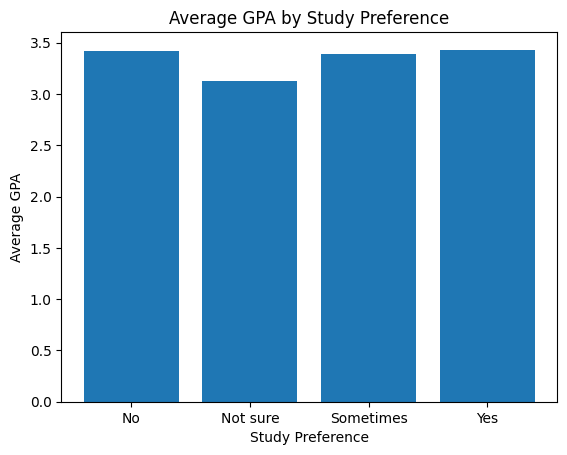

In [12]:
import matplotlib.pyplot as plt

df["gpa"] = df["What is your current cumulative GPA?"].apply(gpa_range_to_avg)
study_pref_mean = df.groupby("Do you prefer studying and/or working in groups? ")["gpa"].mean() 

plt.bar(study_pref_mean.index, study_pref_mean.values)
plt.xlabel("Study Preference")
plt.ylabel("Average GPA")
plt.title("Average GPA by Study Preference")
plt.show()

## Hypotheses

We will present our hypotheses in the form of null hypotheses: <br> - There is no statistically significant relationship between why students chose CS and their GPA <br> - There is no statistically significant relationship between whether students study alone or in groups and their GPA <br> - There is no statistically significant relationship between student involvement in STEM-based research and their GPA